In [2]:
#https://www.youtube.com/watch?v=8ZZDNd4eyVI&t=1s&ab_channel=Mr.PSolver
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [3]:
t, g = smp.symbols('t g')
m1, m2 = smp.symbols('m1 m2')
L1, L2 = smp.symbols('L1, L2')

In [4]:
the1, the2 = smp.symbols(r'\theta_1, \theta_2', cls=smp.Function)

In [5]:
the1 = the1(t)
the2 = the2(t)

In [6]:
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)
the1_dd = smp.diff(the1_d, t)
the2_dd = smp.diff(the2_d, t)

In [7]:
x1 = L1*smp.sin(the1)
y1 = -L1*smp.cos(the1)

x2 = x1 + L2*smp.sin(the2)
y2 = y1 - L2*smp.cos(the2)

In [8]:
# Kinetic energy: it's 1/2mV^2 
T1 = 1/2 * m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2)
T2 = 1/2 * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2)
T = T1 + T2

# potential energy
V1 = m1*g*y1
V2 = m2*g*y2
V = V1 + V2

# lagrangian 
L = T-V



In [9]:
LE1 = (smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t)).simplify()
LE2 = (smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t)).simplify() 

In [10]:
# sympy.solve() assumes all [LE1, LE2, LE3, LE4] each are equal to zero
sols = smp.solve([LE1, LE2], (the1_dd, the2_dd), simplify=True, rational=True)

In [11]:
dz1dt_f = smp.lambdify((t, g, m1, m2, L1, L2, the1, the2, the1_d, the2_d), sols[the1_dd])
dz2dt_f = smp.lambdify((t, g, m1, m2, L1, L2, the1, the2, the1_d, the2_d), sols[the2_dd])

In [12]:
# we turned 2 second order differential equations into 4 first order differential equations (4 of them are just mou3amil) bcz sympy can't solve second orders, check a bit before 21:51 in video
dz1dt_f = smp.lambdify((t, g, m1, m2, L1, L2, the1, the2, the1_d, the2_d), sols[the1_dd])
dz2dt_f = smp.lambdify((t, g, m1, m2, L1, L2, the1, the2, the1_d, the2_d), sols[the2_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)
dthe2dt_f = smp.lambdify(the2_d, the2_d)

def dSdt(S, t, g, m1, m2, L1, L2):
    the1, z1, the2, z2 = S
    
    return [
        dthe1dt_f(z1),
        dz1dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
        dthe2dt_f(z2),
        dz2dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2)
    ]

In [13]:
t = np.linspace(0, 40, 1001)
g = 9.81
m1=1
m2=1
L1=1
L2=1

theta1 = np.pi*3/4
theta1dot = 0
theta2 = np.pi*3/4
theta2dot = 0
ans = odeint(dSdt, y0=[theta1, theta1dot, theta2, theta2dot], t=t, args=(g, m1, m2, L1, L2))

In [14]:
the1 = ans.T[0]
the1dot = ans.T[1]
the2 = ans.T[2]
the2dot = ans.T[3]
i = 1

x1 = L1*np.sin(the1)
y1 = -L1*np.cos(the1)

x2 = x1 + L2*np.sin(the2)
y2 = y1 - L2*np.cos(the2)

print(the1[i], the2[i], the1dot[i],the2dot[i])
print(x1[i], y1[i], x2[i], y2[i])

2.3506348565414505 2.3562047241847726 -0.27849088442792835 0.0010184186363442088
0.7110270874501482 0.7031646186435714 1.4181266320742223 1.4102786363185338


In [15]:
def get_x1y1x2y2(t, the1, the2, L1, L2):
    x1 = L1*np.sin(the1)
    y1 = -L1*np.cos(the1)

    x2 = x1 + L2*np.sin(the2)
    y2 = y1 - L2*np.cos(the2)
    return (x1, y1, x2, y2)

In [45]:
import cv2
import numpy as np
from time import sleep

#Kp = 0.1
#Kd = 0.0001
M1 = 1
M2 = 1
L1 = 1
L2 = 1
g = 9.8

'''
def kpChanged(arg):
    global Kp
    Kp = arg/100

def kdChanged(arg):
    global Kd
    Kd = arg/100

def m1Changed(arg):
    global M1
    M1 = arg

def m2Changed(arg):
    global M2
    M2 = arg
    
cv2.namedWindow('output', cv2.WINDOW_AUTOSIZE)
cv2.createTrackbar('Kp', 'output', 0, 100, kpChanged)
cv2.createTrackbar('Kd', 'output', 0, 100, kdChanged)
cv2.createTrackbar('M1', 'output', 0, 10, m1Changed)
cv2.createTrackbar('M2', 'output', 0, 10, m2Changed)

cv2.setTrackbarPos('Kp','output', int(Kp*100))
cv2.setTrackbarPos('Kd','output', int(Kd*100))
cv2.setTrackbarPos('M1','output', M1)
cv2.setTrackbarPos('M2','output', M2)
'''
    
width = 400
height = 400
window = np.zeros((height, width, 3), dtype=np.uint8)

from time import time
previous_time = 0

theta1 = np.pi*3/4
theta1dot = 0
theta2 = np.pi*3/4
theta2dot = 0

theta1dotdot = 0
theta2dotdot = 0

t = np.linspace(0, 40, 1001)
dt = 0.04


#desired_theta1 = np.pi*1/4
#desired_theta2 = np.pi*1/4

#desired_theta1dot = 0
#desired_theta2dot = 0

i = -1
while True:
    
    i = i + 1
    if i >= len(the1):
        i = 0
    #current_time = int(time()*1000)
    #if current_time - previous_time > 1000/3: # 25 fps

    try:
        window = np.zeros((height, width, 3), dtype=np.uint8)

        elbow = (200-L1*np.sin(the1[i])*70, 200+L1*np.cos(the1[i])*70)
        end_effector = (elbow[0]-L2*np.sin(the2[i])*70, elbow[1]+L2*np.cos(the2[i])*70)

        elbow = (int(elbow[0]), int(elbow[1]))
        end_effector = (int(end_effector[0]), int(end_effector[1]))

        window = cv2.line(window, (200, 200), elbow, (255, 0, 0), 6)
        window = cv2.line(window, elbow, end_effector, (255, 0, 0), 6)
        #print("this took", (int(time()*1000)-current_time))

        #previous_time = current_time

        cv2.imshow('output', window)

    except Exception as e:
        print(e)
        theta1 = np.pi*3/4
        theta1dot = 0
        theta2 = np.pi*3/4
        theta2dot = 0
        t = 0

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
        
    
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
from time import sleep

Kp = 0.1
Kd = 0.0001
M1 = 1
M2 = 1

def kpChanged(arg):
    global Kp
    Kp = arg/100

def kdChanged(arg):
    global Kd
    Kd = arg/100

def m1Changed(arg):
    global M1
    M1 = arg

def m2Changed(arg):
    global M2
    M2 = arg
    
cv2.namedWindow('output', cv2.WINDOW_AUTOSIZE)
cv2.createTrackbar('Kp', 'output', 0, 100, kpChanged)
cv2.createTrackbar('Kd', 'output', 0, 100, kdChanged)
cv2.createTrackbar('M1', 'output', 0, 10, m1Changed)
cv2.createTrackbar('M2', 'output', 0, 10, m2Changed)

cv2.setTrackbarPos('Kp','output', int(Kp*100))
cv2.setTrackbarPos('Kd','output', int(Kd*100))
cv2.setTrackbarPos('M1','output', M1)
cv2.setTrackbarPos('M2','output', M2)
    
    
width = 400
height = 400
window = np.zeros((height, width, 3), dtype=np.uint8)

from time import time
previous_time = 0

g = 9.8
R1 = 20
R2 = 20

theta1 = np.pi*0/4
theta1dot = 0
theta2 = np.pi*0/4
theta2dot = 0

desired_theta1 = np.pi*1/4
desired_theta2 = np.pi*1/4

desired_theta1dot = 0
desired_theta2dot = 0

t = 0
dt = 0.1
#https://www.youtube.com/watch?v=Q-_SxAI_Arc&list=PLm7vssGgA4rEe-Oe3_RjvcZ4wfFL8Ht7w&index=9&t=2135s&ab_channel=PhysicsExplained
while True:
    #current_time = int(time()*1000)
    #if current_time - previous_time > 1000/3: # 25 fps

    try:
        window = np.zeros((height, width, 3), dtype=np.uint8)

        a = -(M1+M2)*g*R1*np.sin(theta1)-M2*R1*R2*theta2dot**2*np.sin(theta1-theta2)
        b = (M1 + M2)*R1**2
        c = M2*R1*R2*np.cos(theta1-theta2)
        f = -M2*g*R2*np.sin(theta2)+M2*R1*R2*theta1dot**2*np.sin(theta1-theta2)
        k = M2*R2**2
        w = M2*R1*R2*np.cos(theta1-theta2)


        T1 = Kd*(desired_theta1dot-theta1dot) + Kp*(desired_theta1-theta1)
        T2 = Kd*(desired_theta2dot-theta2dot) + Kp*(desired_theta2-theta2)
        theta2ddot = (T2+f-a*w/b)/(k-c*w/b)
        theta1ddot = a/b - c*theta2ddot/b + T1
        theta2dot = theta2dot + theta2ddot*dt
        theta1dot = theta1dot + theta1ddot*dt
        theta1 = theta1 + theta1dot*dt
        theta2 = theta2 + theta2dot*dt
        t = t + dt

        elbow = (200-R1*np.sin(theta1)*5, 200+R1*np.cos(theta1)*5)
        end_effector = (elbow[0]-R2*np.sin(theta2)*5, elbow[1]+R2*np.cos(theta2)*5)

        elbow = (int(elbow[0]), int(elbow[1]))
        end_effector = (int(end_effector[0]), int(end_effector[1]))

        window = cv2.line(window, (200, 200), elbow, (255, 0, 0), 6)
        window = cv2.line(window, elbow, end_effector, (255, 0, 0), 6)
        #print("this took", (int(time()*1000)-current_time))

        #previous_time = current_time

        cv2.imshow('output', window)

    except Exception as e:
        #print(e)
        theta1 = np.pi*0/4
        theta1dot = 0
        theta2 = np.pi*0/4
        theta2dot = 0

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
        
    
cv2.destroyAllWindows()

In [48]:
import cv2
import numpy as np
from time import sleep

#Kp = 0.1
#Kd = 0.0001
M1 = 1
M2 = 1
L1 = 1
L2 = 1
g = 9.8

'''
def kpChanged(arg):
    global Kp
    Kp = arg/100

def kdChanged(arg):
    global Kd
    Kd = arg/100

def m1Changed(arg):
    global M1
    M1 = arg

def m2Changed(arg):
    global M2
    M2 = arg
    
cv2.namedWindow('output', cv2.WINDOW_AUTOSIZE)
cv2.createTrackbar('Kp', 'output', 0, 100, kpChanged)
cv2.createTrackbar('Kd', 'output', 0, 100, kdChanged)
cv2.createTrackbar('M1', 'output', 0, 10, m1Changed)
cv2.createTrackbar('M2', 'output', 0, 10, m2Changed)

cv2.setTrackbarPos('Kp','output', int(Kp*100))
cv2.setTrackbarPos('Kd','output', int(Kd*100))
cv2.setTrackbarPos('M1','output', M1)
cv2.setTrackbarPos('M2','output', M2)
'''
    
width = 400
height = 400
window = np.zeros((height, width, 3), dtype=np.uint8)

from time import time
previous_time = 0

theta1 = np.pi*3/4
theta1dot = 0
theta2 = np.pi*3/4
theta2dot = 0

theta1dotdot = 0
theta2dotdot = 0

t = np.linspace(0, 40, 1001)
dt = 0.04


#desired_theta1 = np.pi*1/4
#desired_theta2 = np.pi*1/4

#desired_theta1dot = 0
#desired_theta2dot = 0

previous_theta1dotdot = 0
previous_theta2dotdot = 0
#print(t, g, M1, M2, L1, L2, theta1, theta2, theta1dot, theta2dot)
print(theta1, theta2, theta1dot, theta2dot)
theta1dotdot = dz1dt_f(0, g, M1, M2, L1, L2, theta1, theta2, theta1dot, theta2dot)
theta2dotdot = dz2dt_f(0, g, M1, M2, L1, L2, theta1, theta2, theta1dot, theta2dot)

x1dotdot = L1*np.sin(theta1dotdot)
y1dotdot = -L1*np.cos(theta1dotdot)

x2dotdot = x1 + L2*np.sin(theta2dotdot)
y2dotdot = y1 - L2*np.cos(theta2dotdot)

previous_theta1dot = theta1dot
previous_theta2dot = theta2dot
x1dot = x1dotdot*dt + 0
y1dot = x1dotdot*dt + 0

x2dot = x2dotdot*dt + 0
y2dot = y2dotdot*dt + 0

x1 = x1dot*dt + 0
y1 = y1dot*dt + 0

x2 = x2dot*dt + 0
y2 = y2dot*dt + 0
print(x1, y1, x2, y2)

        
while False:
    #current_time = int(time()*1000)
    #if current_time - previous_time > 1000/3: # 25 fps

    try:
        window = np.zeros((height, width, 3), dtype=np.uint8)

        previous_theta1dotdot = theta1dotdot
        previous_theta2dotdot = theta2dotdot
        #print(t, g, M1, M2, L1, L2, theta1, theta2, theta1dot, theta2dot)
        theta1dotdot = dz1dt_f(t, g, M1, M2, L1, L2, theta1, theta2, theta1dot, theta2dot)
        theta2dotdot = dz2dt_f(t, g, M1, M2, L1, L2, theta1, theta2, theta1dot, theta2dot)
        
        previous_theta1dot = theta1dot
        previous_theta2dot = theta2dot
        theta1dot = theta1dotdot*dt + previous_theta1dotdot
        theta2dot = theta2dotdot*dt + previous_theta2dotdot

        theta1 = theta1dot*dt + previous_theta1dot
        theta2 = theta2dot*dt + previous_theta2dot
        
        print(theta1, theta2, theta1dot, theta2dot)
        break
        
        t = t + dt

        elbow = (200-L1*np.sin(theta1)*70, 200+L1*np.cos(theta1)*70)
        end_effector = (elbow[0]-L2*np.sin(theta2)*70, elbow[1]+L2*np.cos(theta2)*70)

        elbow = (int(elbow[0]), int(elbow[1]))
        end_effector = (int(end_effector[0]), int(end_effector[1]))

        window = cv2.line(window, (200, 200), elbow, (255, 0, 0), 6)
        window = cv2.line(window, elbow, end_effector, (255, 0, 0), 6)
        #print("this took", (int(time()*1000)-current_time))

        #previous_time = current_time

        cv2.imshow('output', window)

    except Exception as e:
        print(e)
        theta1 = np.pi*3/4
        theta1dot = 0
        theta2 = np.pi*3/4
        theta2dot = 0
        t = 0

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
        
    
cv2.destroyAllWindows()

2.356194490192345 2.356194490192345 0 0
-0.0009637846395482854 -0.0009637846395482854 -1.5420554232772568e-06 -0.0016015420554232774


In [19]:
import cv2
import numpy as np
from time import sleep

#Kp = 0.1
#Kd = 0.0001
M1 = 1
M2 = 1
L1 = 1
L2 = 1
g = 9.8

'''
def kpChanged(arg):
    global Kp
    Kp = arg/100

def kdChanged(arg):
    global Kd
    Kd = arg/100

def m1Changed(arg):
    global M1
    M1 = arg

def m2Changed(arg):
    global M2
    M2 = arg
    
cv2.namedWindow('output', cv2.WINDOW_AUTOSIZE)
cv2.createTrackbar('Kp', 'output', 0, 100, kpChanged)
cv2.createTrackbar('Kd', 'output', 0, 100, kdChanged)
cv2.createTrackbar('M1', 'output', 0, 10, m1Changed)
cv2.createTrackbar('M2', 'output', 0, 10, m2Changed)

cv2.setTrackbarPos('Kp','output', int(Kp*100))
cv2.setTrackbarPos('Kd','output', int(Kd*100))
cv2.setTrackbarPos('M1','output', M1)
cv2.setTrackbarPos('M2','output', M2)
'''
    
width = 400
height = 400
window = np.zeros((height, width, 3), dtype=np.uint8)

from time import time
previous_time = 0

theta1 = np.pi*3/4
theta1dot = 0
theta2 = np.pi*3/4
theta2dot = 0

previous_theta1 = theta1
previous_theta2 = theta2

previous_theta1dot = theta1dot
previous_theta2dot = theta2dot

theta1dotdot = 0
theta2dotdot = 0

t = np.linspace(0, 40, 1001)
dt = 0.04


#desired_theta1 = np.pi*1/4
#desired_theta2 = np.pi*1/4

#desired_theta1dot = 0
#desired_theta2dot = 0

        
while True:
    #current_time = int(time()*1000)
    #if current_time - previous_time > 1000/3: # 25 fps

    try:
        window = np.zeros((height, width, 3), dtype=np.uint8)

        #print(t, g, M1, M2, L1, L2, theta1, theta2, theta1dot, theta2dot)
        theta1dotdot = dz1dt_f(t, g, M1, M2, L1, L2, theta1, theta2, theta1dot, theta2dot)
        theta2dotdot = dz2dt_f(t, g, M1, M2, L1, L2, theta1, theta2, theta1dot, theta2dot)
        
        previous_theta1dot = theta1dot
        previous_theta2dot = theta2dot
        theta1dot = theta1dotdot*dt + previous_theta1dot
        theta2dot = theta2dotdot*dt + previous_theta2dot

        previous_theta1 = theta1
        previous_theta2 = theta2
        theta1 = theta1dot*dt + previous_theta1
        theta2 = theta2dot*dt + previous_theta2
        
        #print(theta1, theta2, theta1dot, theta2dot)

        t = t + dt

        elbow = (200-L1*np.sin(theta1)*70, 200+L1*np.cos(theta1)*70)
        end_effector = (elbow[0]-L2*np.sin(theta2)*70, elbow[1]+L2*np.cos(theta2)*70)

        elbow = (int(elbow[0]), int(elbow[1]))
        end_effector = (int(end_effector[0]), int(end_effector[1]))

        window = cv2.line(window, (200, 200), elbow, (255, 0, 0), 6)
        window = cv2.line(window, elbow, end_effector, (255, 0, 0), 6)
        #print("this took", (int(time()*1000)-current_time))

        #previous_time = current_time

        cv2.imshow('output', window)

    except Exception as e:
        print(e)
        theta1 = np.pi*3/4
        theta1dot = 0
        theta2 = np.pi*3/4
        theta2dot = 0
        t = 0

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
        
    
cv2.destroyAllWindows()

<lambdifygenerated-3>:2: RuntimeWarning: overflow encountered in double_scalars
  return (-(-_Dummy_43**2*L2*m2*sin(_Dummy_45 - _Dummy_46) - 1/2*_Dummy_44**2*L1*m2*sin(2*_Dummy_45 - 2*_Dummy_46) + g*m1*sin(_Dummy_46) + (1/2)*g*m2*sin(_Dummy_46) - 1/2*g*m2*sin(2*_Dummy_45 - _Dummy_46))/(L1*(m1 - m2*cos(_Dummy_45 - _Dummy_46)**2 + m2)))
<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (-(-_Dummy_43**2*L2*m2*sin(_Dummy_45 - _Dummy_46) - 1/2*_Dummy_44**2*L1*m2*sin(2*_Dummy_45 - 2*_Dummy_46) + g*m1*sin(_Dummy_46) + (1/2)*g*m2*sin(_Dummy_46) - 1/2*g*m2*sin(2*_Dummy_45 - _Dummy_46))/(L1*(m1 - m2*cos(_Dummy_45 - _Dummy_46)**2 + m2)))
<lambdifygenerated-4>:2: RuntimeWarning: overflow encountered in double_scalars
  return ((-1/2*_Dummy_47**2*L2*m2*sin(2*_Dummy_49 - 2*_Dummy_50) - _Dummy_48**2*L1*m1*sin(_Dummy_49 - _Dummy_50) - _Dummy_48**2*L1*m2*sin(_Dummy_49 - _Dummy_50) - 1/2*g*m1*sin(_Dummy_49) - 1/2*g*m1*sin(_Dummy_49 - 2*_Dummy_50) - 1/2*g*m2*si

cannot convert float NaN to integer


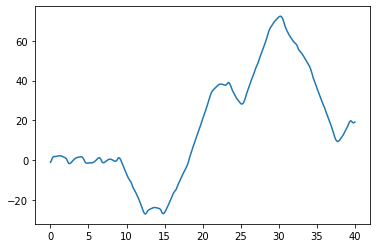

In [67]:
plt.plot(t, the2)

In [68]:
def get_x1y1x2y2(t, the1, the2, L1, L2):
    x1 = L1*np.sin(the1)
    y1 = -L1*np.cos(the1)

    x2 = x1 + L2*np.sin(the2)
    y2 = y1 - L2*np.cos(the2)
    return (x1, y1, x2, y2)

x1, y1, x2, y2 = get_x1y1x2y2(t, ans.T[0], ans.T[2], L1, L2)

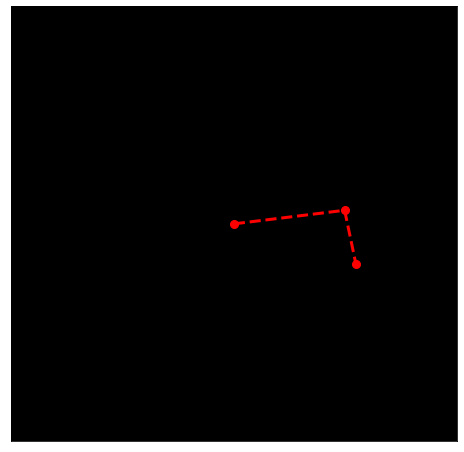

In [69]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([]) # hide x axis
ax.get_yaxis().set_ticks([]) # hide y axis

ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
#ln2, = plt.plot([], [], 'ro-', lw=3, markersize=8, alpha=0.05, color='cyan')
#ln3, = plt.plot([], [], 'ro-', lw=3, markersize=8, alpha=0.05, color='cyan')
ax.set_ylim(-4, 4)
ax.set_xlim(-4, 4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen.gif', writer='pillow', fps=25)